In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [244]:
# Se tiene la base de datos: 
base_enaho = pd.read_parquet("../data/raw/BBDD_TF_carac_sociodemograficas.parquet")

In [245]:
base_enaho.columns

Index(['año', 'conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'male',
       'edad', 'casado', 'educacion', 'enfermedad_cronica', 'seguro_essalud',
       'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis',
       'tamaño_empresa', 'gastos_mensuales', 'iddep', 'agua_potable',
       'electricidad', 'telefono', 'celular', 'tv', 'internet'],
      dtype='object')

In [246]:
base_enaho['año']

0         2018
1         2018
2         2018
5         2018
6         2018
          ... 
128263    2019
128265    2019
128268    2019
128273    2019
128274    2019
Name: año, Length: 52737, dtype: int64

# Paso 1: Entre todas estas se elige la variable gastos_mensuales, variable continua como variable endógena

Los predictores serán male (por sexo), edad(Importante para no sesgar el trabajo invisible o domestico), educación (de acuerdo a la educación puede ser que incurran en mas gastos porque tienen más ingresos), Casado (un casado tiene más gastos que una persona soltera u otros, hubiera sido preferible tener más situaciones sentimentales), Todos los seguros y todos los servicios puesto que se incurre gastos en ello, también tamaño_empresa (el tamaño de la empresa que permite tener mayores ingresos porque si es grande puede haber mayor techo salarial), enfermedad_cronica  (que tenga una enfermedad crónica siempre genera gastos extras).

In [247]:

col = ['gastos_mensuales', 'male', 'edad', 'casado', 'educacion', 'enfermedad_cronica', 'seguro_essalud', 'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis', 'tamaño_empresa', 'agua_potable', 'electricidad', 'telefono', 'celular', 'tv', 'internet']
cb = base_enaho[col]

In [248]:
cb.head()

,gastos_mensuales,male,edad,casado,educacion,enfermedad_cronica,seguro_essalud,seguro_privado,seguro_eps,seguro_policial,seguro_sis,tamaño_empresa,agua_potable,electricidad,telefono,celular,tv,internet
0,878.532516,0.0,49.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1033.537623,0.0,22.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0
2,516.768812,0.0,21.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
5,1446.969697,1.0,60.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
6,155.005107,0.0,58.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [249]:
cb.shape

(52737, 18)

## Paso 2.1: Estadísticas descriptivas

In [250]:
cb.describe().T

,count,mean,std,min,25%,50%,75%,max
gastos_mensuales,52737.0,1394.197305,1362.364088,5.107252,607.933265,1044.433095,1803.881512,25838.781069
male,52737.0,0.598119,0.490283,0.000000,0.000000,1.000000,1.000000,1.000000
edad,52737.0,38.918501,14.134688,14.000000,27.000000,38.000000,49.000000,95.000000
casado,52737.0,0.266227,0.441988,0.000000,0.000000,0.000000,1.000000,1.000000
educacion,52737.0,2.192958,0.759628,1.000000,2.000000,2.000000,3.000000,4.000000
enfermedad_cronica,52737.0,0.413979,0.492549,0.000000,0.000000,0.000000,1.000000,1.000000
seguro_essalud,52737.0,0.439691,0.496354,0.000000,0.000000,0.000000,1.000000,1.000000
seguro_privado,52737.0,0.024271,0.153892,0.000000,0.000000,0.000000,0.000000,1.000000
seguro_eps,52737.0,0.014980,0.121474,0.000000,0.000000,0.000000,0.000000,1.000000
seguro_policial,52737.0,0.004437,0.066464,0.000000,0.000000,0.000000,0.000000,1.000000


# Paso 2.2. Evaluación de los valores missings y recomendación

In [251]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Porcentaje de missing values por columna', fontsize=20, weight='bold' , y=1.1)
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns con más de {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columnas con menos de {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columnas', size=15, weight='bold')
    plt.ylabel('Porcentaje de missing values')
    plt.yticks(weight ='bold')
    
    return plt.show()

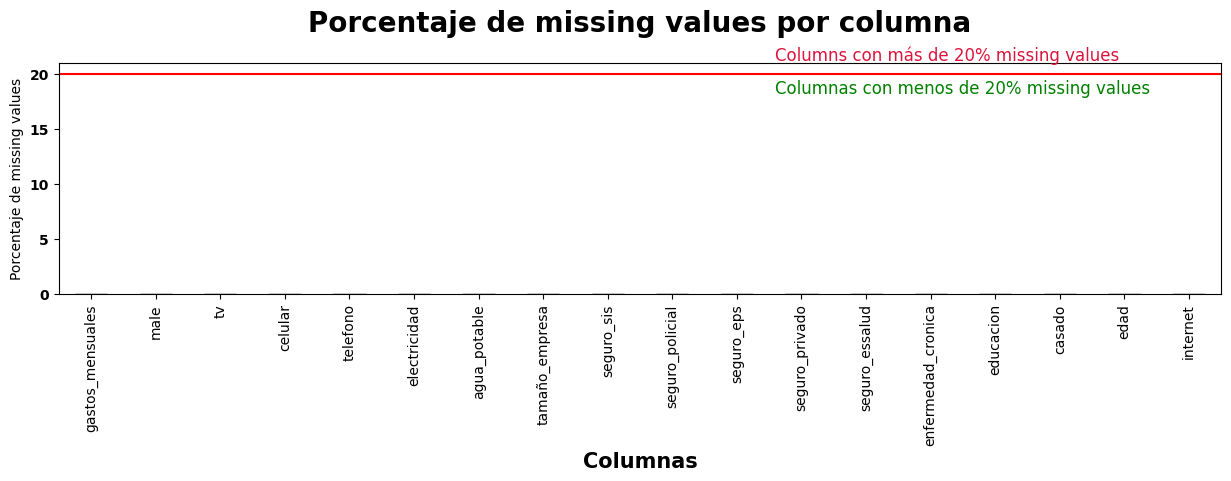

In [252]:
msv_1(cb, 20, color=sns.color_palette('Reds',15))

En este caso no hay muestra de missings. Sea el caso de que los missings están escondidos con ceros, no puede estar planteado de tal forma porque hay variables dicotómicas o dummys. La data no presenta missings y se encuentra bien especificada. 

In [253]:
cb[['gastos_mensuales']]=cb[['gastos_mensuales']].replace(99999.99, np.nan)

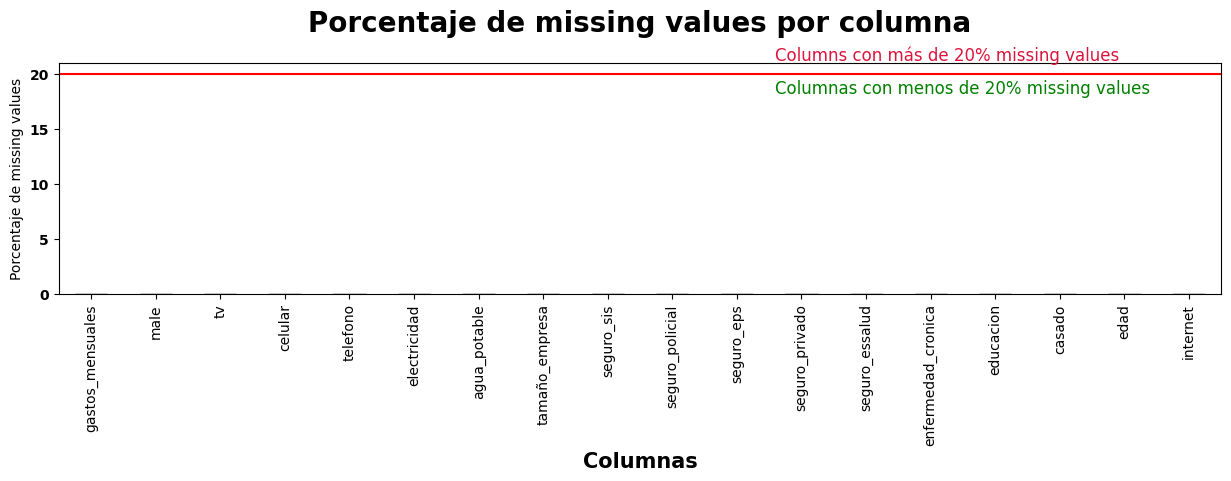

In [254]:
msv_1(cb, 20, color=sns.color_palette('Reds',15))

# Paso 2.3. Evaluación de outliers en variables continuas y recomendación sobre qué hacer con ellas

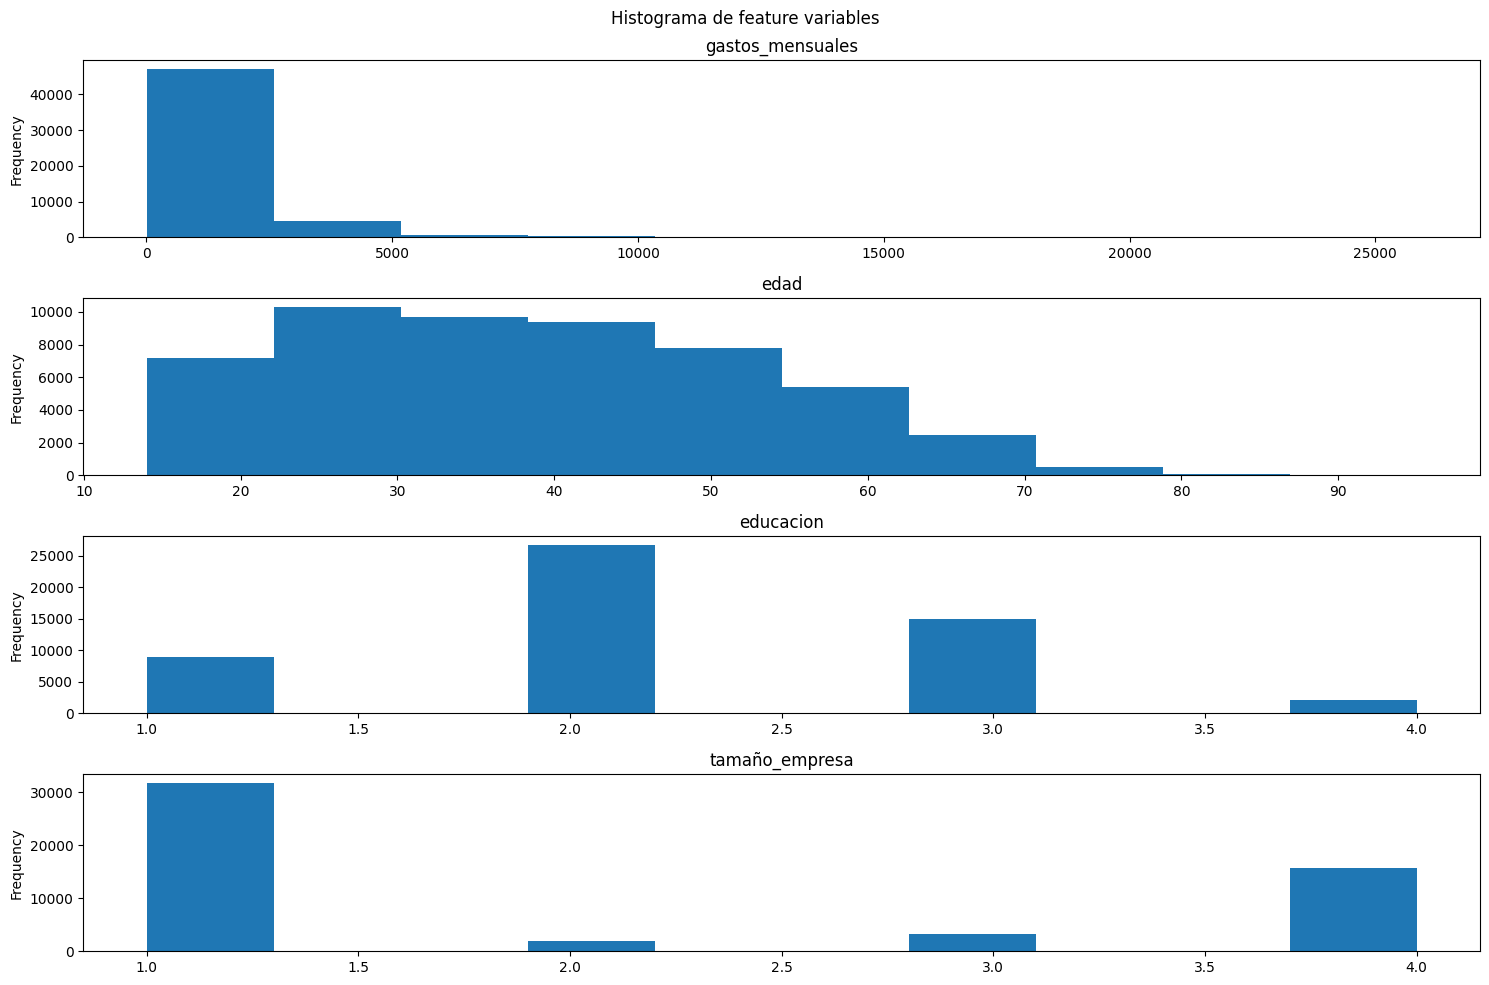

In [255]:
# Figura con 4 filas y 1 columna de subgráficos, con un tamaño de 15x10 pulgadas
fig, axes = plt.subplots(4, 1, figsize=(15, 10))
axes = axes.flatten()
# Inicializar un índice para recorrer las columnas del DataFrame
ax_idx = 0
# Obtener las columnas del DataFrame, excluyendo la columnas con variables dummys 
columns_to_drop = ['male', 'casado', 'enfermedad_cronica', 'seguro_essalud', 'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis', 'agua_potable', 'electricidad', 'telefono', 'celular', 'tv', 'internet']
columns = cb.drop(columns_to_drop, axis=1).columns
# Iterar a través de las columnas y crear histogramas en cada subgráfico
for col in columns:
    # Crear un histograma para la columna actual en el subgráfico correspondiente
    cb[col].plot(kind='hist', ax=axes[ax_idx], title=col)
    # Incrementar el índice para pasar al siguiente subgráfico
    ax_idx += 1
# Agregar un título general para los subgráficos
plt.suptitle('Histograma de feature variables')
# Ajustar automáticamente la disposición de los subgráficos para evitar superposiciones
plt.tight_layout()
# Mostrar los subgráficos
plt.show()

Se puede ver que la variable de interés aún muestra una distribución al lado izquierdo porque hay outliers a la derecha, esto puede ser porque las personas se encuentran en distintos niveles socioeconómicos y por su puesto los de mayor nivel tienen mayores gastos proporcionales a sus ingresos. Para ello primero se tiene que comprobar la asimetria de las continuas con Skewness.

In [256]:
from scipy.stats import skew

for col in cb.drop(columns_to_drop, axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, cb[col].skew()))

Skewness for the column gastos_mensuales is 3.750861348448835
Skewness for the column edad is 0.32946714303979524
Skewness for the column educacion is 0.21387730530875546
Skewness for the column tamaño_empresa is 0.6099334924243461


In [257]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52737 entries, 0 to 128274
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gastos_mensuales    52737 non-null  float64
 1   male                52737 non-null  float64
 2   edad                52737 non-null  float64
 3   casado              52737 non-null  float64
 4   educacion           52737 non-null  float64
 5   enfermedad_cronica  52737 non-null  float64
 6   seguro_essalud      52737 non-null  float64
 7   seguro_privado      52737 non-null  float64
 8   seguro_eps          52737 non-null  float64
 9   seguro_policial     52737 non-null  float64
 10  seguro_sis          52737 non-null  float64
 11  tamaño_empresa      52737 non-null  float64
 12  agua_potable        52737 non-null  float64
 13  electricidad        52737 non-null  float64
 14  telefono            52737 non-null  float64
 15  celular             52737 non-null  float64
 16  tv      

Se puede ver que todas las variables son numéricas, así damos paso a las recomendaciones sobre distribución y outliers.

# Recomendación:
Evaluando los outliers de la variable de interés 'gastos_mensuales' mediante Boxplots. Así eliminar los outliers que no permiten correctas estimaciones. 

En primer lugar se trabajará con la variable de gastos mensuales en logaritmos

In [258]:
cb['gastos_mensuales'] = np.log(cb['gastos_mensuales'])

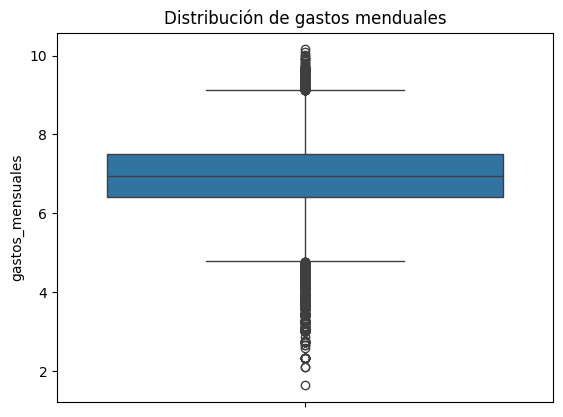

In [259]:
sns.boxplot(y='gastos_mensuales', data = cb)
plt.title('Distribución de gastos menduales')
plt.show()

In [260]:
# Calculo del primer y tercer cuartil (Q1 y Q3)
Q1 = cb['gastos_mensuales'].quantile(0.25)
Q3 = cb['gastos_mensuales'].quantile(0.75)

# Calculo del rango intercuartílico (IQR)
IQR = Q3 - Q1

# Límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra los valores que están fuera de los límites definidos
cd = cb[(cb['gastos_mensuales'] >= lower_bound) & (cb['gastos_mensuales'] <= upper_bound)]


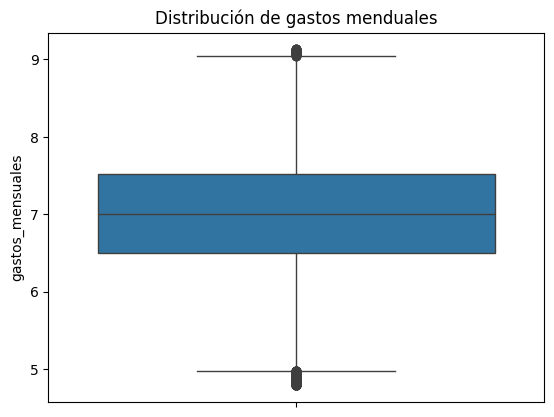

In [261]:
sns.boxplot(y='gastos_mensuales', data = cd)
plt.title('Distribución de gastos menduales')
plt.show()

Por otro lado se analiza la variable de edad. Esto porque se muestra que la distribución alada a la derecha, aún cuando hay personas de poca edad que son dependientes, se podría decir hasta los 21 años. Lo cual implica que no incurren en gastos, sería un poco ilógico considerar esos valores en el modelo.

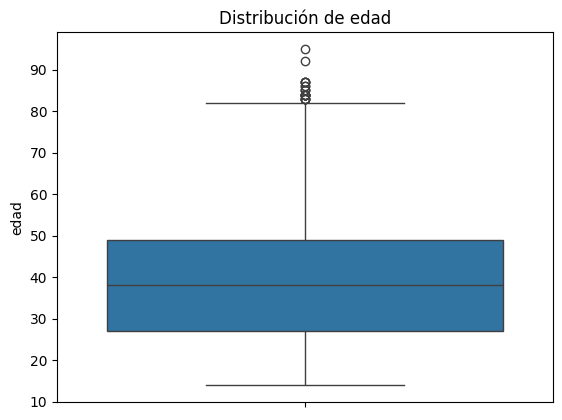

In [262]:
sns.boxplot(y='edad', data = cd)
plt.title('Distribución de edad')
plt.show()

In [263]:
# Calculo del primer y tercer cuartil (Q1 y Q3)
Q1ed = cd['edad'].quantile(0.25)
Q3ed = cd['edad'].quantile(0.75)

# Calculo del rango intercuartílico (IQR)
IQRed = Q3ed - Q1ed

# Límites para detectar outliers
lb = Q1ed - 1.5 * IQRed
ub = Q3ed + 1.5 * IQRed

# Filtra los valores que están fuera de los límites definidos
cme = cd[(cd['edad'] >= lb) & (cd['edad'] <= ub)]

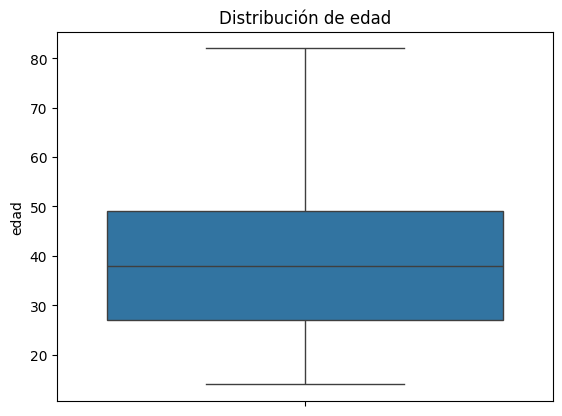

In [264]:
sns.boxplot(y='edad', data = cme)
plt.title('Distribución de edad')
plt.show()

# *Analizando nuevamente la concordancia de las distribuciones*

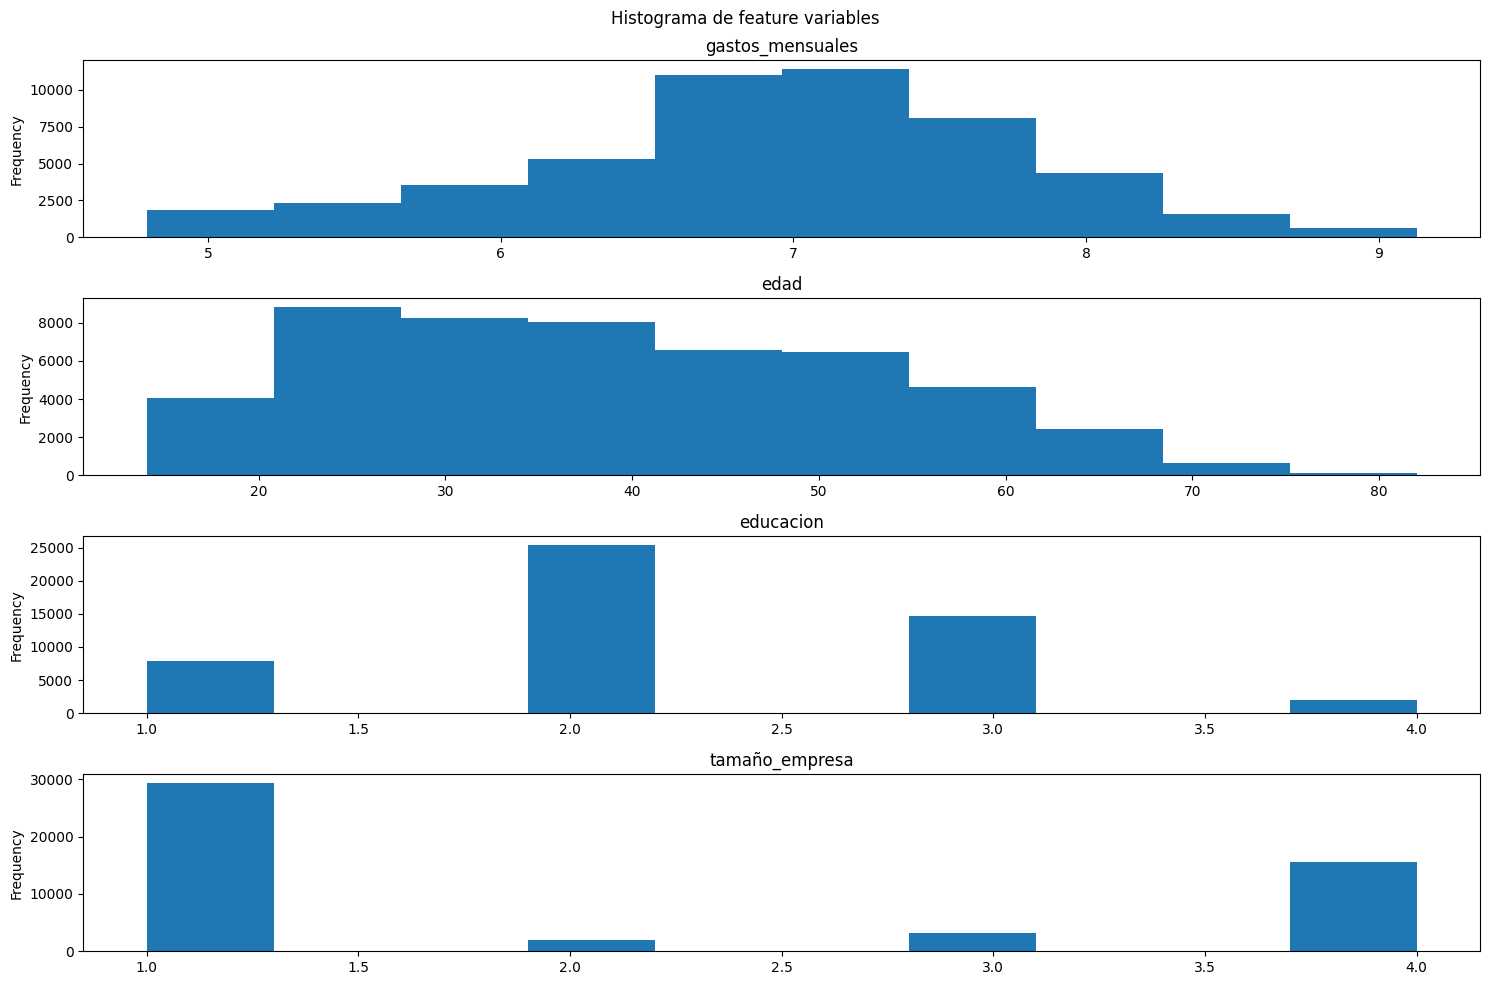

In [265]:
# Figura con 4 filas y 1 columna de subgráficos, con un tamaño de 15x10 pulgadas
fig, axes = plt.subplots(4, 1, figsize=(15, 10))
axes = axes.flatten()
# Inicializar un índice para recorrer las columnas del DataFrame
ax_idx = 0
# Obtener las columnas del DataFrame, excluyendo la columnas con variables dummys 
columns_to_drop = ['male', 'casado', 'enfermedad_cronica', 'seguro_essalud', 'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis', 'agua_potable', 'electricidad', 'telefono', 'celular', 'tv', 'internet']
columns = cme.drop(columns_to_drop, axis=1).columns
# Iterar a través de las columnas y crear histogramas en cada subgráfico
for col in columns:
    # Crear un histograma para la columna actual en el subgráfico correspondiente
    cme[col].plot(kind='hist', ax=axes[ax_idx], title=col)
    # Incrementar el índice para pasar al siguiente subgráfico
    ax_idx += 1
# Agregar un título general para los subgráficos
plt.suptitle('Histograma de feature variables')
# Ajustar automáticamente la disposición de los subgráficos para evitar superposiciones
plt.tight_layout()
# Mostrar los subgráficos
plt.show()

Problema resuelto

# Paso 2.4. Evaluación de la distribución

# *Analizando el gasto de las personas casadas o no casadas*

In [266]:
def mean_target(var):
    return pd.DataFrame(cme.groupby('casado').mean()[var])


In [267]:
def distplot(colname):
    # Crear una nueva figura para el gráfico de distribución.
    plt.figure() 
    ax = sns.distplot(cme[colname][cme.casado == 1], color="red", rug=True) 
    # Trazar la distribución de 'gastos_mensuales' para personas sin diabetes en azul claro.
    sns.distplot(cme[colname][cme.casado == 0], color="pink", rug=True)   
    # Agregar una leyenda para indicar las categorías en el gráfico.
    plt.legend(['Casado', 'No casado'])

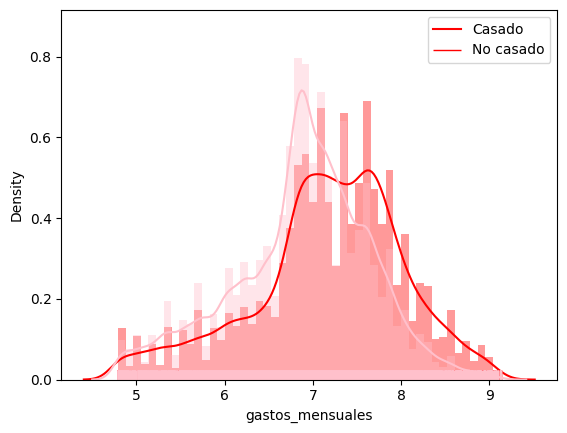

In [268]:
distplot('gastos_mensuales')

In [269]:
mean_target('gastos_mensuales')

,gastos_mensuales
casado,
0.0,6.873212
1.0,7.168102


Se puede ver que las personas casadas tienen una mayor tendencia a incurrir en más gastos.

# *Analizando la distribución por enfermedad crónica*

In [270]:
def mean_target(varec):
    return pd.DataFrame(cme.groupby('enfermedad_cronica').mean()[varec])

In [271]:
def distplot(colname_ec):
    # Crear una nueva figura para el gráfico de distribución.
    plt.figure() 
    ax = sns.distplot(cme[colname_ec][cme.enfermedad_cronica == 1], color="red", rug=True) 
    # Trazar la distribución de 'gastos_mensuales' para personas sin diabetes en azul claro.
    sns.distplot(cme[colname_ec][cme.enfermedad_cronica == 0], color="pink", rug=True)   
    # Agregar una leyenda para indicar las categorías en el gráfico.
    plt.legend(['Tuvo enfermedad crónica', 'No tuvo enfermedad crónica'])

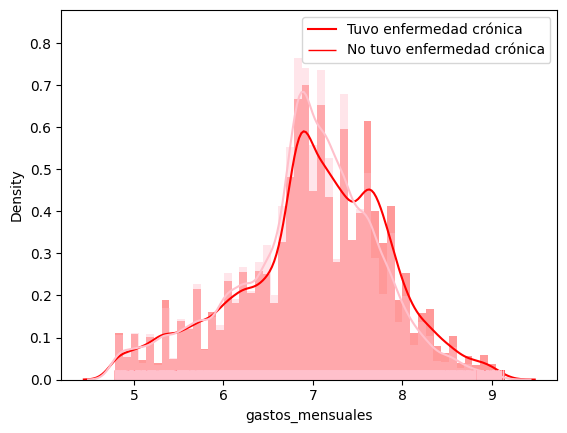

In [272]:
distplot('gastos_mensuales')

In [273]:
mean_target('gastos_mensuales')

,gastos_mensuales
enfermedad_cronica,
0.0,6.915556
1.0,7.003326


Hay una ligera y poco significativa tendencia en gastos mensuales para las personas que presentan efermedades crónicas

# *Analizando gastos por sexo*

In [274]:
def mean_target(varx):
    return pd.DataFrame(cme.groupby('male').mean()[varx])

In [275]:
def distplot(colname_x):
    # Crear una nueva figura para el gráfico de distribución.
    plt.figure() 
    ax = sns.distplot(cme[colname_x][cme.male == 1], color="red", rug=True) 
    # Trazar la distribución de 'gastos_mensuales' para personas sin diabetes en azul claro.
    sns.distplot(cme[colname_x][cme.male == 0], color="pink", rug=True)   
    # Agregar una leyenda para indicar las categorías en el gráfico.
    plt.legend(['Hombre', 'Mujer'])

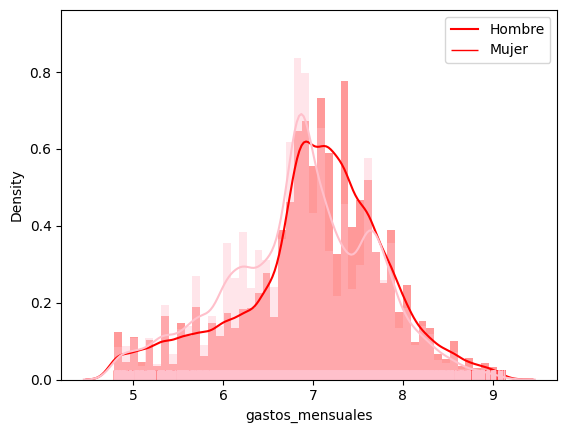

In [276]:
distplot('gastos_mensuales')

In [277]:
mean_target('gastos_mensuales')

,gastos_mensuales
male,
0.0,6.864707
1.0,7.010301


Se puede ver que hay una mayor tendencia en los gastos más altos en el caso de ser hombre. Esto puede ser explicado por trabajo invicible. 

# Paso 2.5. Visualización de datos bivariados entre varibles continuas

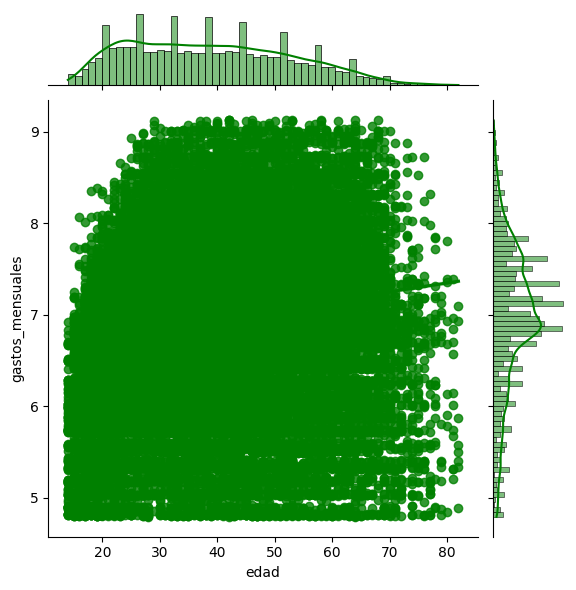

In [278]:
sns.jointplot(x= 'edad',y='gastos_mensuales', data=cme, kind = 'reg', color = 'green')
plt.show()

No se muestra una correlación clara, se puede decir que las distribuciones al parecer se encuentran aladas a la izquierda.  Hay un indicio de que una mayor edad tenga una tendencia a mayores gastos. 

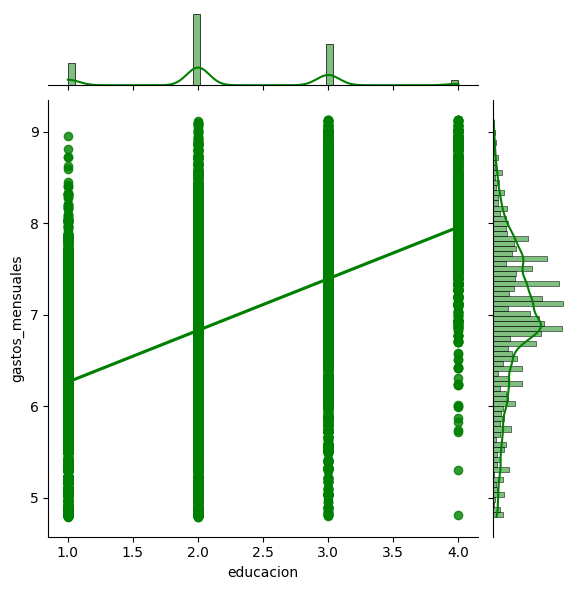

In [279]:
sns.jointplot(x= 'educacion',y='gastos_mensuales', data=cme, kind = 'reg', color = 'green')
plt.show()

Acá se muestra que hay una mayor correlación con la variable categórica. A pesar de ser categórica las distribuciones cuentan con los mismos picos. Puede ser que la correlación esté asociada a ello. 

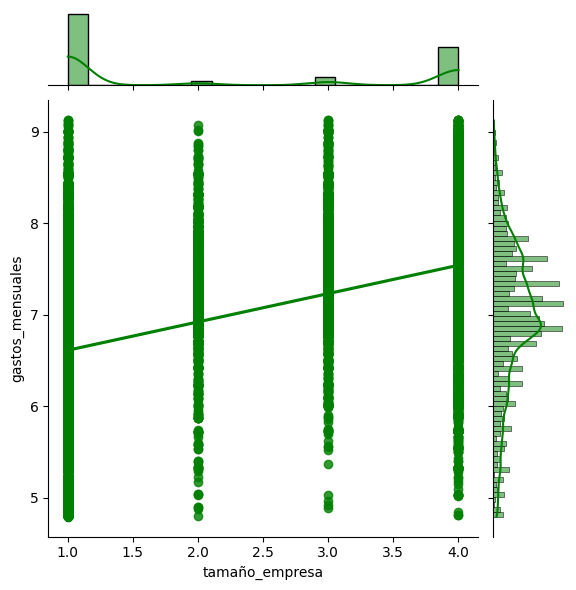

In [280]:
sns.jointplot(x= 'tamaño_empresa',y='gastos_mensuales', data=cme, kind = 'reg', color = 'green')
plt.show()

Acá se muestra que hay una correlación positiva entre la variable categórica y la variable endógena, gastos mensuales. A pesar de ser categórica las distribuciones cuentan con los mismos picos, sobre todo a la derecha e izquierda. Puede ser que la correlación esté asociada a ello. 

# Paso 2.6. Visualización y análisis de correlación

In [281]:
# Se evalua las correlaciones en el caso de variables continuas o categóricas
corr_cme=cme[['gastos_mensuales', 'edad', 'educacion', 'tamaño_empresa']]

<Axes: >

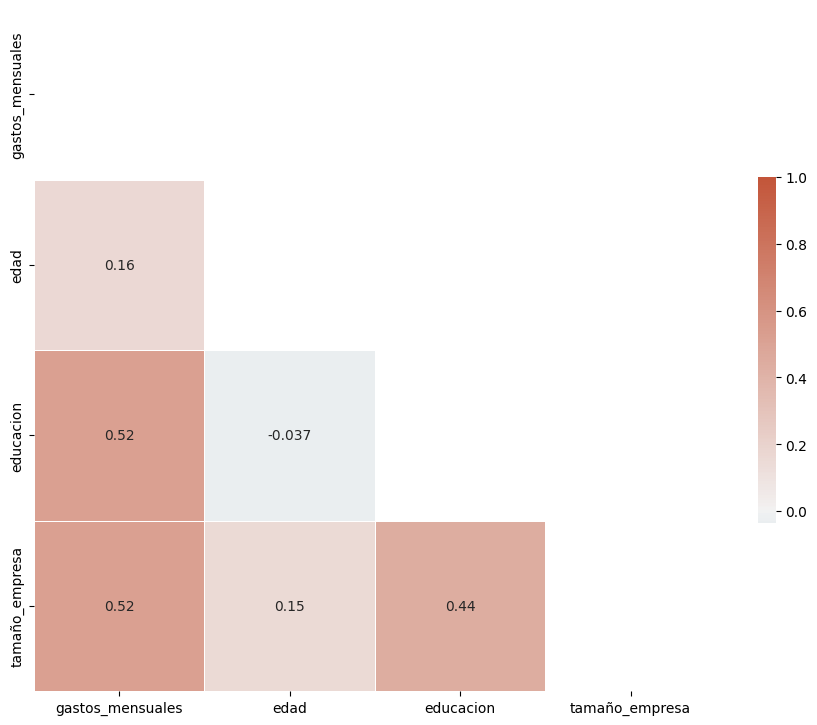

In [282]:
# Calcula la matriz de correlación entre las columnas del DataFrame.
corr = corr_cme.corr()
# Crea una máscara triangular superior en la matriz de correlación para ocultar los valores duplicados.
mask = np.triu(np.ones_like(corr, dtype=bool))
# Crea una figura para el gráfico de calor de la matriz de correlación.
f, ax = plt.subplots(figsize=(11, 9))
# Define una paleta de colores divergentes para el gráfico de calor.
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Trazar un mapa de calor de la matriz de correlación.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

En primera instancia se puede ver que hay correlación positiva entre la variable de interés 'gastos_mensuales' y edad, educación y tamaño de empresa. 

La variable continua 'edad' no muestra mucha correlación con la de 'gastos_mensuales'. Puede deberse a que los gastos pueden ser independientes a la edad. Ya que el consumo básico promedio puede estar destinado a la alimentación y entre otros recursos de subsistencia. Los excedentes pueden estar dirigidos a ahorro e inversión. 

Por otro lado, para las variables categóricas si se muestra una correlación media. Por el lado de la educación, mayor educación puede requerir mayores gastos educativos y otro tipo de gastos asociados con el desarrollo de una situación socioeconómica de mayor nivel. Por el lado del tamaño de empresa, los trabajadores que perciben mayores ingresos por pertenecer a una empresa más grande, tienen mayores posibilidades de gasto promedio mensual, lo cual puede estar implicando el tamaño de la correlación. 

<Axes: >

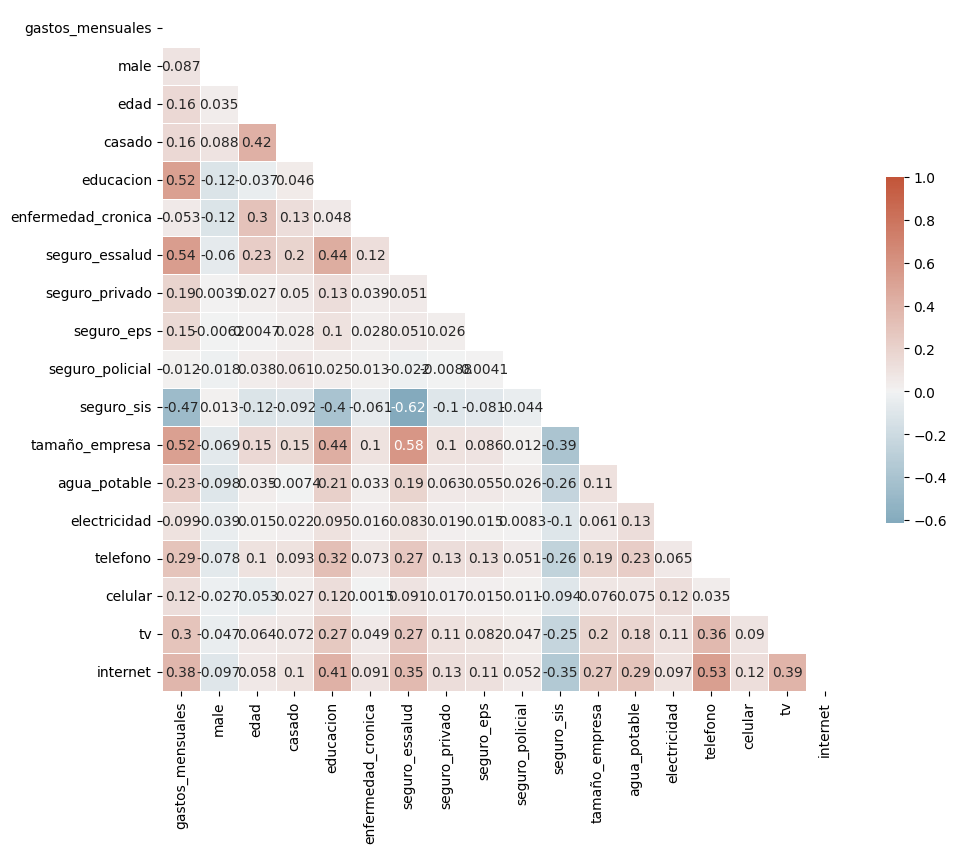

In [283]:
# Calcula la matriz de correlación entre las columnas del DataFrame.
corr = cme.corr()
# Crea una máscara triangular superior en la matriz de correlación para ocultar los valores duplicados.
mask = np.triu(np.ones_like(corr, dtype=bool))
# Crea una figura para el gráfico de calor de la matriz de correlación.
f, ax = plt.subplots(figsize=(11, 9))
# Define una paleta de colores divergentes para el gráfico de calor.
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Trazar un mapa de calor de la matriz de correlación.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Si se integran las demás variables Dummy, se puede ver que la gran mayoría tiene correlación positiva a excepción de la variable de seguro sis, puesto que esta es gratuita y no habría que incurrir en ningun gasto, incluso al parecer la correlación es negativa. Aquella tendencia puede deberse a que la mayoría de afiliados son personas de bajo nivel socieconómico, lo cual implica que hay menos gastos involucrados en dicho sector. 

## Paso 3. Entrenamiento del modelo 

In [284]:
pip install scikit-learn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [285]:
#En el caso de nuestro Data Frame todas las variables complen con la característica de ser numérica 
cme.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50121 entries, 0 to 128274
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gastos_mensuales    50121 non-null  float64
 1   male                50121 non-null  float64
 2   edad                50121 non-null  float64
 3   casado              50121 non-null  float64
 4   educacion           50121 non-null  float64
 5   enfermedad_cronica  50121 non-null  float64
 6   seguro_essalud      50121 non-null  float64
 7   seguro_privado      50121 non-null  float64
 8   seguro_eps          50121 non-null  float64
 9   seguro_policial     50121 non-null  float64
 10  seguro_sis          50121 non-null  float64
 11  tamaño_empresa      50121 non-null  float64
 12  agua_potable        50121 non-null  float64
 13  electricidad        50121 non-null  float64
 14  telefono            50121 non-null  float64
 15  celular             50121 non-null  float64
 16  tv      

Se definen los imputs del modelo.
Se eliminará la variable de seguros sis y seguro policial puesto que ambos son gratuitos, también debería de haberse eliminado uno de estos para no caer en trampa de dummys. 
Por otro lado, se elimina la variable de edad que no muestra ser significativa respecto a la correlación con el gasto mensual; sin embargo, debe estar presente puesto que puede servir de variable instrumental para poder captural el ahorro del agente en el futuro.
En el caso de servicios tener tv puede ser independiente de tener agua u electricidad, con lo cual, no se incurre en trampa de dummys.
Así mismo se elimina la variable de enfermedad crónica del estudio puesto que de haber un seguro, la enfermedad crónica no habría de ser un gasto mayor. Lo cual puede generar trampa de dummys de ser integrada con respecto a las variables de seguros.

In [287]:


X=cme[['male', 'edad', 'casado', 'educacion', 'seguro_essalud', 
       'seguro_privado', 'seguro_eps', 'tamaño_empresa', 
       'agua_potable', 'electricidad', 'telefono', 
       'celular', 'tv', 'internet']]
y=cme[['gastos_mensuales']]
print(X.shape, y.shape)

(50121, 14) (50121, 1)


Ahora ha llegado el momento de dividir los datos en Train y Test

In [288]:
# Se importa el train_test_split

from sklearn.model_selection import train_test_split

Se separa la data de entrenamiento de la data de testing al 30%

In [289]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# *Modelo de regresión lineal*

Se utiliza la data de train para probar el modelo 

In [290]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [293]:
# Obtener los coeficientes y los nombres de las columnas
coeficientes = lin_reg.coef_
nombres_columnas = X_train.columns
# Asegurarse de que los coeficientes sean 1D
coeficientes = coeficientes.flatten()
# Crear un DataFrame con los nombres de las columnas y los coeficientes
coeficientes_df = pd.DataFrame({'Columna': nombres_columnas, 'Coeficiente': coeficientes})
coeficientes_df

,Columna,Coeficiente
0,male,0.271368
1,edad,0.003479
2,casado,0.023012
3,educacion,0.278074
4,seguro_essalud,0.355176
5,seguro_privado,0.484851
6,seguro_eps,0.495527
7,tamaño_empresa,0.130739
8,agua_potable,0.165241
9,electricidad,0.111163


# *Support Vector Machine*

In [294]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=100, epsilon=0.05)

svm_reg.fit(X_train, y_train)

Test set evaluation:
_____________________________________
MAPE: 6.584053342474896
MPE: -1.601470133051993
R2 Square: 0.5250071182132143
% Observaciones en ±20% de MAPE: gastos_mensuales    94.653189
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 6.604131455100508
MPE: -1.5800906932039727
R2 Square: 0.5184674060630108
% Observaciones en ±20% de MAPE: gastos_mensuales    94.567324
dtype: float64
__________________________________


In [1]:
# Vectores de soporte (muestras más cercanas al hiperplano de decisión)
support_vectors = svm_reg.support_vectors_

# Coeficientes (pesos) asignados a los vectores de soporte
dual_coef = svm_reg.dual_coef_

# Sesgo (intercept) del modelo
intercept = svm_reg.intercept_

# Índices de las muestras de entrenamiento que son el vector de soporte
support_indices = svm_reg.support_

support_vectors
dual_coef
intercept
support_indices

NameError: name 'svm_reg' is not defined

# Paso 5. Evaluación de métricas y elección del mejor modelo

# *Modelo de regresión lineal*

Metricas de evaluación

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics

# Función print_evaluate(true, predicted): imprime las métricas de evaluación del modelo.
def print_evaluate(true, predicted):  
    mape = np.mean(np.abs((true - predicted) / true)) * 100  # Error porcentual absoluto medio (MAPE)
    mpe = np.mean((true - predicted) / true) * 100  # Error porcentual medio (MPE)
    r2_square = metrics.r2_score(true, predicted)  # Coeficiente de determinación R^2
    
    # Calcular el porcentaje de observaciones dentro del ±20% de MAPE
    ape = np.abs((true - predicted) / true) * 100
    within_20_percent = np.sum(ape <= 20) / len(true) * 100
    
    print('MAPE:', mape)
    print('MPE:', mpe)
    print('R2 Square:', r2_square)
    print('% Observaciones en ±20% de MAPE:', within_20_percent)
    print('__________________________________')

Evaluación regresión lineal

In [306]:
# * Métricas de evaluación

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluación:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluación:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluación:
_____________________________________
MAPE: 6.847558591397626
MPE: -0.8125290721992254
R2 Square: 0.4971838609298961
% Observaciones en ±20% de MAPE: gastos_mensuales    94.799495
dtype: float64
__________________________________
Train set evaluación:
_____________________________________
MAPE: 6.89054428856449
MPE: -0.8119211011452225
R2 Square: 0.48959396600949623
% Observaciones en ±20% de MAPE: gastos_mensuales    94.875157
dtype: float64
__________________________________


Evaluación support vector machine

In [ ]:

# * Métricas de evaluación

test_pred = svm_reg.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = svm_reg.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

In [295]:
# Calculamos la predicción
pred = lin_reg.predict(X_test)

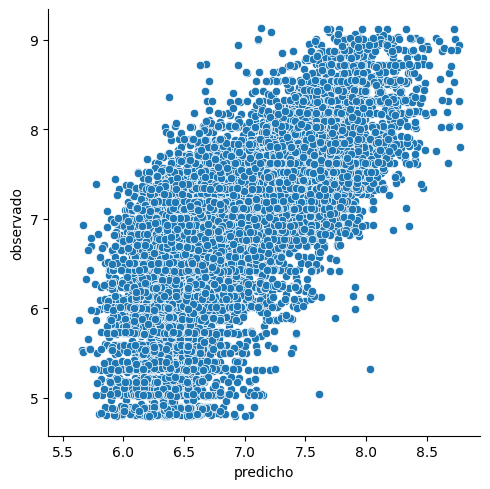

In [296]:
# Creamos un DF
pred = pd.DataFrame(pred, columns=['prediccion_lr'])
# Lo unimos con la data observada
pred_lin_reg = pd.concat([pred, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
pred_lin_reg.columns =['predicho','observado']
# Creamos un gráfico
sns.relplot(data=pred_lin_reg, x='predicho',y='observado')

In [297]:
pred_lin_reg

,predicho,observado
0,6.298480,6.186992
1,6.087086,4.808715
2,7.782266,8.610443
3,7.522524,7.838581
4,6.568774,6.100585
...,...,...
15032,7.479042,7.689161
15033,7.189448,7.473143
15034,6.615073,7.094776
15035,6.782342,6.864085


<Axes: xlabel='error', ylabel='Count'>

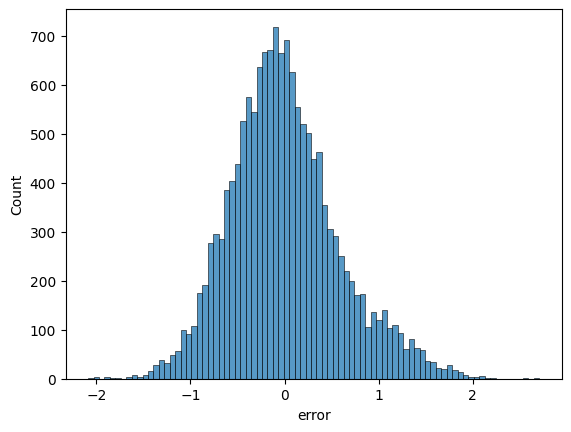

In [298]:
pred_lin_reg['error'] = pred_lin_reg['predicho'] - pred_lin_reg['observado']
sns.histplot(data=pred_lin_reg, x='error')

In [299]:
pred_lin_reg

,predicho,observado,error
0,6.298480,6.186992,0.111488
1,6.087086,4.808715,1.278371
2,7.782266,8.610443,-0.828177
3,7.522524,7.838581,-0.316056
4,6.568774,6.100585,0.468189
...,...,...,...
15032,7.479042,7.689161,-0.210119
15033,7.189448,7.473143,-0.283695
15034,6.615073,7.094776,-0.479703
15035,6.782342,6.864085,-0.081743


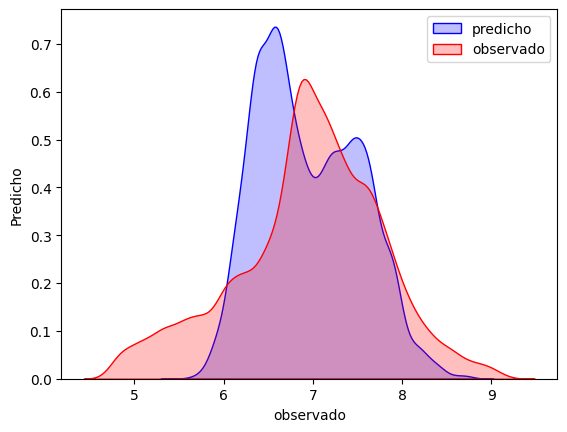

In [300]:
# Creamos un gráfico de densidad para evaluar la diferencia entre lo predico y lo observado
sns.kdeplot(pred_lin_reg['predicho'], color='blue', label='predicho', shade=True)
sns.kdeplot(pred_lin_reg['observado'], color='red', label='observado', shade=True)
plt.legend()
plt.xlabel('observado')
plt.ylabel('Predicho')
plt.show()

En este caso se buscó evaluar los efectos porcentuales de los gastos adicionales a la canasta básica que pueden influir en el sueldo mínimo. Lo cual puede servir para la economía laboral para entender los gastos que deben considerarse al momento de seleccionar un salario mínimo. Además, es importante para modelos de desarrollo. Las variables en cuestión, a parte de la alimentación son importantes para el desarrollo humano y requieren ser mejor evaluadas para crecimiento como para mejorar índices sociales, sobre todo en aspectos que especifica la PNUD -Programa de las Naciones Unidas para el Desarrollo- (salud, educación y pobreza)

A partir de ello se evaluó la variable de gastos mensuales como endógena en logaritmos. Los métodos utilizados, tanto la regresión como el support vector machine nos muestran bastante robustes en el estudio. 

En este caso, se prefiere trabajar con la Regresión lineal porque es un método simple y se encuentra bastante bien cercano a lo observado en relación a lo predicho. Así mismo, se puede evaluar los efectos independientes de cada variable de acuerdo a sus coeficientes o estimadores. 